<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Convolutional Neural Networks with Keras</font></h1>

In this lab, we will learn how to use the keras library to build convolutional neural networks. We will also use the popular MNIST dataset and we will compare our results to using a conventional neural network.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
      
1. <a href="#item2">Import Keras and Packages</a>   
2. <a href="#item3">Convolutional Neural Network with One Convolutional and Pooling Layers</a>  
3. <a href="#item4">Convolutional Neural Network with Two Convolutional and Pooling Layers</a>  

</font>
</div>

## Import Keras and Packages

Let's start by importing the keras libraries and the packages that we would need to build a neural network.

In [1]:
import pandas as pd

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

When working with convolutional neural networks in particular, we will need additional packages.

In [3]:
from keras.layers.convolutional import Conv2D # to add convolutional layers
from keras.layers.convolutional import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers

## Convolutional Layer with two sets of convolutional and pooling layers

In [4]:
# import data
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

Let's normalize the pixel values to be between 0 and 1

In [5]:
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data

Next, let's convert the target variable into binary categories

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories

Next, let's define a function that creates our model. Let's start with one set of convolutional and pooling layers.

In [7]:
def convolutional_model():
    # Create model
    model = Sequential()
    model.add(
        Conv2D(
            16,
            (5, 5),
            strides = (1, 1),
            activation = "relu",
            input_shape = (28, 28, 1),
        )
    )
    model.add(
        MaxPooling2D(
            pool_size = (2, 2),
            strides = (2, 2),
        )
    )
    
    model.add(Flatten())
    model.add(Dense(100, activation = "relu"))
    model.add(Dense(num_classes, activation = "softmax"))
    
    # Compile model
    model.compile(
        optimizer = "adam",
        loss = "categorical_crossentropy",
        metrics = ["accuracy"],
    )
    
    return model

Finally, let's call the function to create the model, and then let's train it and evaluate it.

In [8]:
# # build the model
# model = convolutional_model()

# # fit the model
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# # evaluate the model
# scores = model.evaluate(X_test, y_test, verbose=0)
# print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

In [9]:
# Build the model
model = convolutional_model()

In [10]:
# Fit the model
history = model.fit(
    X_train,
    y_train,
    validation_data = (X_test, y_test),
    epochs = 10,
    batch_size = 200,
    verbose = 0, # verbose = 2,
)

In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [12]:
df_history_loss = pd.DataFrame(
    data = {
        "loss" : history.history["loss"],
        "val_loss" : history.history["val_loss"],
    }
)

In [13]:
df_history_accuracy = pd.DataFrame(
    data = {
        "accuracy" : history.history["accuracy"],
        "val_accuracy" : history.history["val_accuracy"],
    }
)

<AxesSubplot:>

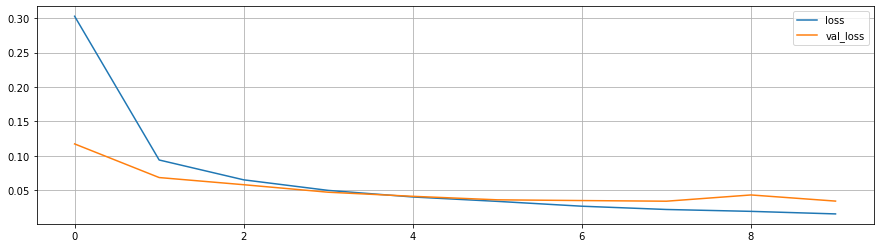

In [14]:
df_history_loss.plot(figsize = (15, 4), grid = True)

<AxesSubplot:>

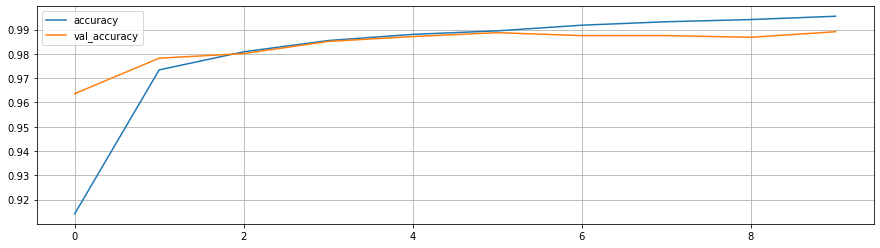

In [15]:
df_history_accuracy.plot(figsize = (15, 4), grid = True)

In [16]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose = 0)

accuracy = scores[1]
error = (100 - accuracy * 100)

print(f"Accuracy: {accuracy} \n Error: {error}")

Accuracy: 0.9890999794006348 
 Error: 1.0900020599365234


## Convolutional Layer with two sets of convolutional and pooling layers

Let's redefine our convolutional model so that it has two convolutional and pooling layers instead of just one layer of each.

In [17]:
def convolutional_model():
    # Create model
    model = Sequential()
    model.add(
        Conv2D(
            16,
            (5, 5),
            activation = "relu",
            input_shape = (28, 28, 1),
        )
    )
    model.add(
        MaxPooling2D(
            pool_size = (2, 2),
            strides = (2, 2),
        )
    )
    
    model.add(
        Conv2D(
            8,
            (2, 2),
            activation = "relu",
            input_shape = (28, 28, 1),
        )
    )
    model.add(
        MaxPooling2D(
            pool_size = (2, 2),
            strides = (2, 2),
        )
    )
    
    model.add(Flatten())
    model.add(Dense(100, activation = "relu"))
    model.add(Dense(num_classes, activation = "softmax"))
    
    # Compile model
    model.compile(
        optimizer = "adam",
        loss = "categorical_crossentropy",
        metrics = ["accuracy"],
    )
    
    return model

Now, let's call the function to create our new convolutional neural network, and then let's train it and evaluate it.

In [18]:
# # build the model
# model = convolutional_model()

# # fit the model
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# # evaluate the model
# scores = model.evaluate(X_test, y_test, verbose=0)
# print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

In [19]:
# Build the model
model = convolutional_model()

In [20]:
# Fit the model
history = model.fit(
    X_train,
    y_train,
    validation_data = (X_test, y_test),
    epochs = 10,
    batch_size = 200,
    verbose = 0, # verbose = 2,
)

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
df_history_loss = pd.DataFrame(
    data = {
        "loss" : history.history["loss"],
        "val_loss" : history.history["val_loss"],
    }
)

In [23]:
df_history_accuracy = pd.DataFrame(
    data = {
        "accuracy" : history.history["accuracy"],
        "val_accuracy" : history.history["val_accuracy"],
    }
)

<AxesSubplot:>

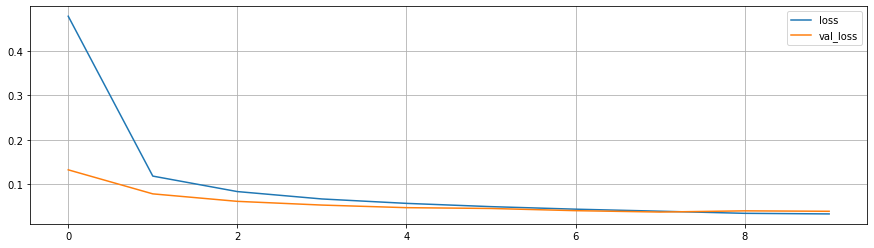

In [24]:
df_history_loss.plot(figsize = (15, 4), grid = True)

<AxesSubplot:>

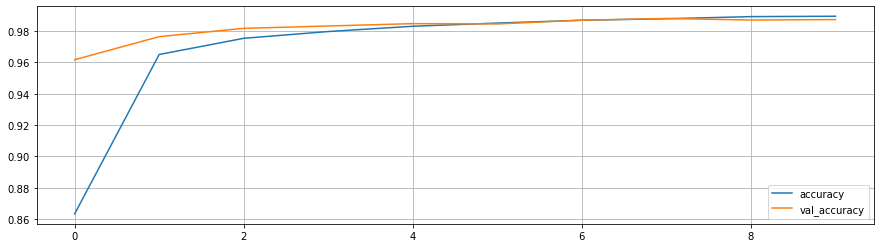

In [25]:
df_history_accuracy.plot(figsize = (15, 4), grid = True)

In [26]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose = 0)

accuracy = scores[1]
error = (100 - accuracy * 100)

print(f"Accuracy: {accuracy} \n Error: {error}")

Accuracy: 0.9872999787330627 
 Error: 1.2700021266937256


### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson/). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!

This notebook is part of a course on **edX** called *Deep Learning Fundamentals with Keras*. If you accessed this notebook outside the course, you can take this course online by clicking [here](http://cocl.us/DL0101EN_edX_Week4_LAB1).

<hr>

Copyright &copy; 2018 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).